Ensure that the path to main project is included in system path

In [2]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
parentdir2 = os.path.dirname(parentdir)
sys.path.insert(0,parentdir2) 
print("Appended directory", parentdir2)

Appended directory /media/aleksejs/DataHDD/work/git/codes/snippets-data-analysis/python3


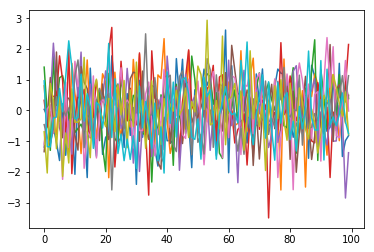

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from aux import randstat

randstat.init()
NData = 100
NDataSet = 10
seqRandLst = [np.random.normal(0, 1, NData) for i in range(NDataSet)]
seqRandPlotLst = [plt.plot(seqRand) for seqRand in seqRandLst]
plt.show()

# Moments

The mean and variance of a random variable are defined as

$\mu(X) = \int_x x \rho(x) dx$

$\sigma^2(X) = \int_x (x - \mu_x)^2 \rho(x) dx$

For empirical estimates, an unbiased estimator for sample mean is average

$\mu(X) \approx \bar{X} = AVG(\vec{x}) = \frac{1}{N} \sum_i x_i$

Average mean squared error is a biased estimator of sample variance. An unbiased estimator is

$\sigma^2(X) \approx s^2(\vec{x}) = \frac{N-1}{N} AVG(\vec{x} - \mu(X))^2 = \frac{1}{N-1} \sum_i (x_i - \mu_x)^2$

Sample variance should converge to its analytical value with increasing measurement number. Variance of the mean of N samples can be show to scale as $1/N$ compared to sample variance, and should thus go to zero with increasing measurement number

$\sigma^2(\bar{X}) = \frac{1}{N} \sigma^2(X)$

Standard deviation is defined as $\sigma(X) = \sqrt{\sigma^2(X)}$

Sample standard deviation is approximately $s(\vec{x}) \approx \sqrt{s^2(\vec{x})}$. There is a small bias, for corrections see https://en.wikipedia.org/wiki/Standard_deviation

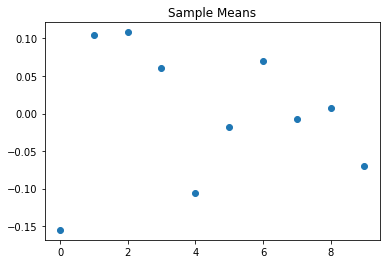

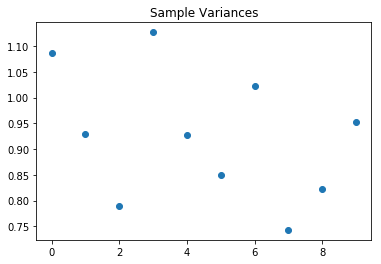

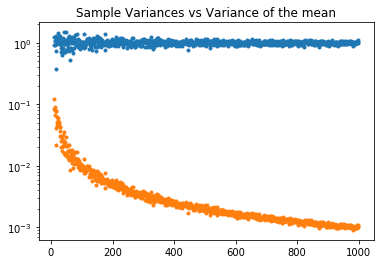

In [5]:
def sample_mean(arr):
    return np.sum(arr)/len(arr)

def sample_var(arr):
    mu = sample_mean(arr)
    return np.sum((arr - mu)**2) / (len(arr) - 1)

def sample_varmean(arr):
    return sample_var(arr) / len(arr)


meanLst = [sample_mean(seqRand) for seqRand in seqRandLst]
varLst = [sample_var(seqRand) for seqRand in seqRandLst]

pltMean = plt.figure()
plt.title('Sample Means')
meanPlot = plt.plot(meanLst, 'o')

pltVar = plt.figure()
plt.title('Sample Variances')
varPlot = plt.plot(varLst, 'o')

varMeanNData = list(range(10, 1000))
varMeanData = [np.random.normal(0, 1, i) for i in varMeanNData]
varConverge = [sample_var(data) for data in varMeanData]
varMeanConverge = [sample_varmean(data) for data in varMeanData]

pltVarConv = plt.figure()
plt.title('Sample Variances vs Variance of the mean')
varConvPlot = plt.semilogy(varMeanNData, varConverge, '.')
varMeanConvPlot = plt.semilogy(varMeanNData, varMeanConverge, '.')


# Cumulative Distributions

The general cumulative distribution is defined as

$CDF_{p(x)}(x') = \int_{x=-\infty}^{x'} p(x)dx$

Generate empirical cumulative distribution functions (ECDF), defined as

$ECDF_{\vec{x}}(x') = \frac{1}{N}\sum_i H(x_i < x')$

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


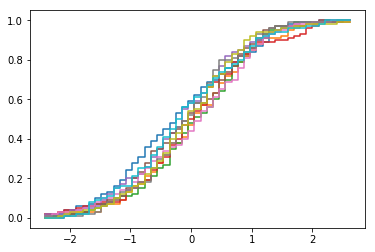

In [6]:
import statsmodels.api as sm

ecdfLst = [sm.distributions.ECDF(seqRand) for seqRand in seqRandLst]
ecdf_x = np.linspace(min(seqRandLst[0]), max(seqRandLst[0]))
ecdf_yLst = [ecdf(ecdf_x) for ecdf in ecdfLst]
ecdf_plot = [plt.step(ecdf_x, ecdf_y) for ecdf_y in ecdf_yLst]

# Correlations

Pearson's correlation coefficient for two random variables is defined as

$CORR(X,Y) = \frac{COV(X,Y)}{\sigma_X \sigma_Y}$

where the covariance is given by 

$COV(X,Y) = \langle (X - \mu_X)(Y-\mu_Y) \rangle = \int_x \int_y \rho(xy) (x - \mu_x)(y- \mu_y)dx dy$

The unbiased sample covariance is given by

$COV(X,Y) \approx s^2(\vec{x}, \vec{y}) = \frac{1}{N-1}\sum_{i} (x_i - \mu_x)(y_i - \mu_y)$

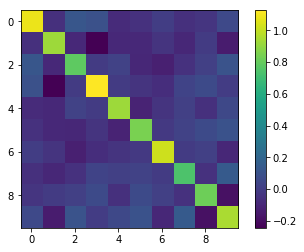

In [66]:
covmat = np.cov(np.array(seqRandLst))
covplot = plt.imshow(covmat)
covclrbar = plt.colorbar()

For small sample sizes, covariance can be significantly non-zero even for random uncorrelated datasets. Let us investigate by how much

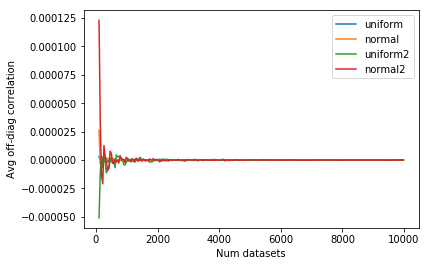

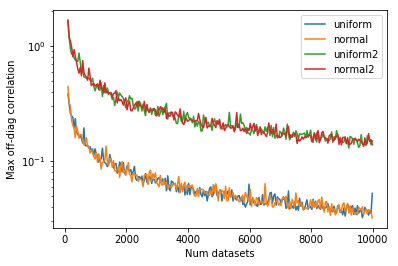

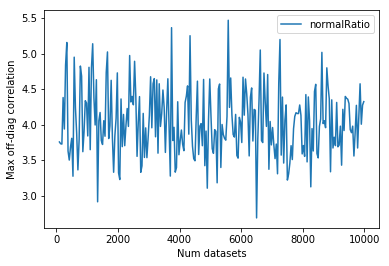

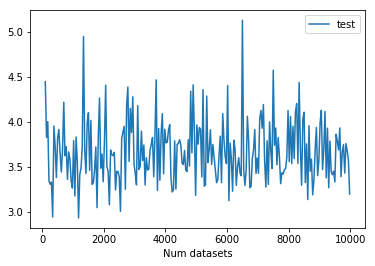

In [107]:
NDataRange = (100, 10000)
NDataStep = 40
NDataSet = 100

covavgU = []
covavgN = []
covmaxU = []
covmaxN = []

covavgU2 = []
covavgN2 = []
covmaxU2 = []
covmaxN2 = []

covmaxRatio = []

covmaxTest = []

NDataLst = list(range(NDataRange[0], NDataRange[1], NDataStep))

for NData in NDataLst:
    seqRandLstU = randUMat(0, np.sqrt(12), (NDataSet, NData))  # Uniform distribution of STDEV 1
    seqRandLstN = randNMat(0, 1, (NDataSet, NData))
    seqRandLstU2 = randUMat(0, 2 * np.sqrt(12), (NDataSet, NData))  # Uniform distribution of STDEV 2
    seqRandLstN2 = randNMat(0, 2, (NDataSet, NData))
    
    # Calculate mean and average off-diagonal covariance
    covMatUTriU = np.triu(np.cov(seqRandLstU), 1)
    covMatNTriU = np.triu(np.cov(seqRandLstN), 1)
    covMatUTriU2 = np.triu(np.cov(seqRandLstU2), 1)
    covMatNTriU2 = np.triu(np.cov(seqRandLstN2), 1)
    covavgU.append(np.mean(covMatUTriU) * NData / (NData * (NData - 1) / 2))
    covavgN.append(np.mean(covMatNTriU) * NData / (NData * (NData - 1) / 2))
    covavgU2.append(np.mean(covMatUTriU2) * NData / (NData * (NData - 1) / 2))
    covavgN2.append(np.mean(covMatNTriU2) * NData / (NData * (NData - 1) / 2))
    covmaxU.append(np.max(covMatUTriU))
    covmaxN.append(np.max(covMatNTriU))
    covmaxU2.append(np.max(covMatUTriU2))
    covmaxN2.append(np.max(covMatNTriU2))
    
    covmaxRatio.append(covmaxN2[len(covmaxN2) - 1] / covmaxN[len(covmaxN) - 1])
    
    covmaxTest.append(covmaxN[len(covmaxN2) - 1] * np.sqrt(NData))
    
plt.figure()
plt.plot(NDataLst, covavgU, label="uniform")
plt.plot(NDataLst, covavgN, label="normal")
plt.plot(NDataLst, covavgU2, label="uniform2")
plt.plot(NDataLst, covavgN2, label="normal2")
plt.xlabel('Num datasets')
plt.ylabel('Avg off-diag correlation')
plt.legend()

plt.figure()
plt.semilogy(NDataLst, covmaxU, label="uniform")
plt.semilogy(NDataLst, covmaxN, label="normal")
plt.semilogy(NDataLst, covmaxU2, label="uniform2")
plt.semilogy(NDataLst, covmaxN2, label="normal2")
plt.xlabel('Num datasets')
plt.ylabel('Max off-diag correlation')
plt.legend()

plt.figure()
plt.plot(NDataLst, covmaxRatio, label="normalRatio")
plt.xlabel('Num datasets')
plt.ylabel('Max off-diag correlation')
plt.legend()

plt.figure()
plt.plot(NDataLst, covmaxTest, label="test")
plt.xlabel('Num datasets')
plt.legend()

plt.show()

Maximal sample covariance of random datasets for 100 data sets $\approx 3.5 \frac{Var(X)}{\sqrt{N}}$ where $Var(X)$ is the variance of the data and $N$ is the number of data points in each set. This means that the sample correlation $\frac{3.5}{\sqrt{N}}$, which can be used as the first sanity check for determining if correlation is significant.  No strong dependence on exact distribution observed.

Now we test if the number of sample distributions has any affect.

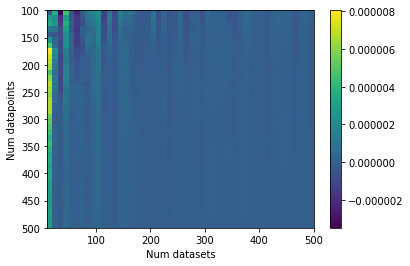

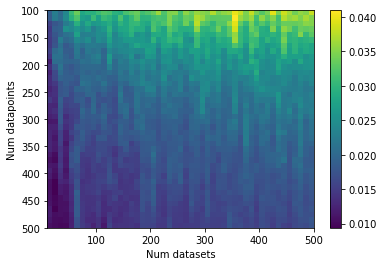

In [108]:
def randUMat(rmin, rmax, rshape):
    return np.array([np.random.uniform(rmin, rmax, rshape[1]) for i in range(rshape[0])])

def randNMat(rmin, rmax, rshape):
    return np.array([np.random.normal(rmin, rmax, rshape[1]) for i in range(rshape[0])])

NData2Range = (100, 500)
NData2SetRange = (10, 500)
NData2Step = 10
NData2SetStep = 10

NData2Lst = list(range(NData2Range[0], NData2Range[1], NData2Step))
NData2SetLst = list(range(NData2SetRange[0], NData2SetRange[1], NData2SetStep))

NData2Size = len(NData2Lst)
NData2SetSize = len(NData2SetLst)
covImgShape = (NData2Size, NData2SetSize)

covavg = np.zeros(covImgShape)
covmax = np.zeros(covImgShape)

for iNDataSet2, NDataSet2 in enumerate(NData2SetLst):
    #print('Doing dataset size', NDataSet2)
    seqRandLst2 = np.zeros((NData2SetRange[0],0))
    for iNData2, NData2 in enumerate(NData2Lst):
        # Generate random numbers necessary to extend all random lists to their new size
        # Append at the end of each list
        if seqRandLst2.shape == (NData2SetRange[0],0):
            seqRandLst2 = randUMat(0, 1, (NDataSet2, NData2Range[0]))
        else:
            seqRandLstIncr = randUMat(0, 1, (NDataSet2, NData2Step))
            seqRandLst2 = np.concatenate((seqRandLst2, seqRandLstIncr), axis=1)
        
        # Calculate mean and average off-diagonal covariance
        covMatU = np.triu(np.cov(seqRandLst2), 1)
        covavg[iNData2][iNDataSet2] = np.mean(covMatU) * NData2 / (NData2 * (NData2 - 1) / 2)
        covmax[iNData2][iNDataSet2] = np.max(covMatU)

covFig2Avg = plt.figure()
covImage2Avg = plt.imshow(covavg, extent=[NData2SetRange[0], NData2SetRange[1], NData2Range[1], NData2Range[0]])
plt.xlabel('Num datasets')
plt.ylabel('Num datapoints')
covColorbar2Avg = plt.colorbar()
covFig2Max = plt.figure()
covImage2Max = plt.imshow(covmax, extent=[NData2SetRange[0], NData2SetRange[1], NData2Range[1], NData2Range[0]])
plt.xlabel('Num datasets')
plt.ylabel('Num datapoints')
covIColorbar2Max = plt.colorbar()

The average covariance is close to 0 and thus always irrelevant. The max covariance appears to weakly increase with dataset count. Need a bit more investigation